In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Load libraries
import numpy as np
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [8]:
data = pd.read_csv("audit_trial.csv.csv")

In [9]:
data.head(10)

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
5,3.89,6,0.00,2,0.83,2,0.83,5.0,2,2.95,2,2,0,2,0,2,2.0,0
6,3.89,7,1.10,4,7.41,4,8.51,5.0,2,44.95,6,2,0,2,0,2,3.2,1
7,3.89,8,8.50,6,12.03,6,20.53,5.5,4,7.79,4,2,0,2,0,2,4.2,1
8,3.89,8,8.40,6,11.05,6,19.45,5.5,4,7.34,4,2,0,2,0,2,4.2,1
9,3.89,8,3.98,6,0.99,2,4.97,5.0,2,1.93,2,2,0,2,0,2,2.4,1


In [10]:
data.tail(10)

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
766,55.57,8,0.80,2,0.57,2,1.37,5.0,2,0.00,2,2,0,2,0,2,2.0,0
767,55.57,18,0.36,2,0.54,2,0.90,5.0,2,0.21,2,2,0,2,0,2,2.0,0
768,55.57,9,0.44,2,0.53,2,0.97,5.0,2,0.00,2,2,0,2,0,2,2.0,0
769,55.57,16,0.51,2,0.50,2,1.01,5.0,2,0.09,2,2,0,2,0,2,2.0,0
770,55.57,18,0.75,2,0.45,2,1.20,5.0,2,0.00,2,2,0,2,0,2,2.0,0
771,55.57,9,0.49,2,0.40,2,0.89,5.0,2,0.00,2,2,0,2,0,2,2.0,0
772,55.57,16,0.47,2,0.37,2,0.84,5.0,2,0.00,2,2,0,2,0,2,2.0,0
773,55.57,14,0.24,2,0.04,2,0.28,5.0,2,0.00,2,2,0,2,0,2,2.0,0
774,55.57,18,0.20,2,0.00,2,0.20,5.0,2,0.00,2,2,0,2,0,2,2.0,0
775,55.57,15,0.00,2,0.00,2,0.00,5.0,2,0.32,2,2,0,2,0,2,2.0,0


In [11]:
data.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,131.313326,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,3589.671373,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.482500,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,99999.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


In [12]:
raw_indices=data.loc[(data.values==99999).any(axis=1)].index.tolist()
print(raw_indices)

[147]


In [13]:
No_of_missing_value = (data[['PARA_A','PARA_B','TOTAL','Money_Value','Loss','History','Risk']] == 0).sum() 
No_of_missing_value

PARA_A         151
PARA_B         279
TOTAL           91
Money_Value    332
Loss           755
History        726
Risk           290
dtype: int64

In [14]:
No_of_missing_value1 = (data[['PARA_A','PARA_B','TOTAL','Money_Value','Loss','History','Risk']] == 99999).sum() 
No_of_missing_value1

PARA_A         1
PARA_B         0
TOTAL          0
Money_Value    0
Loss           0
History        0
Risk           0
dtype: int64

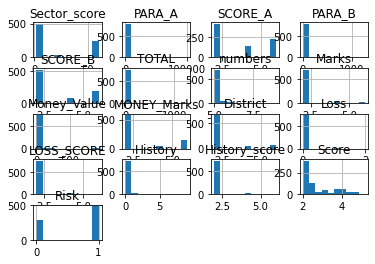

In [15]:
data.hist()
plt.show()

In [16]:
data.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [17]:
Data_outliers=(abs(data-data.mean())>3*data.std()).sum()
Data_outliers

C:\Users\myneee101\AppData\Local\Temp/ipykernel_5164/662980232.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Data_outliers=(abs(data-data.mean())>3*data.std()).sum()
C:\Users\myneee101\AppData\Local\Temp/ipykernel_5164/662980232.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Data_outliers=(abs(data-data.mean())>3*data.std()).sum()


District          0
History          15
History_score    15
LOCATION_ID       0
LOSS_SCORE       22
Loss             21
MONEY_Marks       0
Marks            22
Money_Value       7
PARA_A            1
PARA_B            1
Risk              0
SCORE_A           0
SCORE_B           0
Score             0
Sector_score      0
TOTAL             2
numbers          22
dtype: int64

In [18]:
data[['PARA_A','PARA_B','TOTAL','Money_Value','Loss','History','Risk']]=data[['PARA_A','PARA_B','TOTAL','Money_Value','Loss','History','Risk']].replace(0,np.nan)
data[['PARA_A','PARA_B','TOTAL','Money_Value','Loss','History','Risk']]=data[['PARA_A','PARA_B','TOTAL','Money_Value','Loss','History','Risk']].replace(99999,np.nan)

In [19]:
data.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,624.000000,776.000000,497.000000,776.000000,685.000000,776.000000,776.000000,443.000000,776.000000,776.000000,21.000000,776.000000,50.000000,776.000000,776.000000,486.0
mean,20.184536,3.045097,3.512887,16.862759,3.131443,14.974513,5.067655,2.237113,24.732876,2.909794,2.505155,1.095238,2.061856,1.620000,2.167526,2.702577,1.0
std,24.319017,6.189168,1.740549,61.780951,1.698042,54.378028,0.264449,0.803517,86.637893,1.597452,1.228678,0.300793,0.375080,1.398104,0.679869,0.858923,0.0
min,1.850000,0.000600,2.000000,0.000900,2.000000,0.010000,5.000000,2.000000,0.007000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.0
25%,2.370000,0.600000,2.000000,0.470000,2.000000,0.850000,5.000000,2.000000,0.355000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.0
50%,3.890000,1.235000,2.000000,1.470000,2.000000,1.720000,5.000000,2.000000,3.080000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.400000,1.0
75%,55.570000,3.317500,6.000000,14.630000,4.000000,9.510000,5.000000,2.000000,15.925000,4.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.250000,1.0
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.0


In [20]:
data.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,NaN,2,NaN,2,2.4,1.0
1,3.89,6,NaN,2,4.83,2,4.83,5.0,2,0.94,2,2,NaN,2,NaN,2,2.0,NaN
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,NaN,2,2,NaN,2,NaN,2,2.0,NaN
3,3.89,6,NaN,2,10.80,6,10.80,6.0,6,11.75,6,2,NaN,2,NaN,2,4.4,1.0
4,3.89,6,NaN,2,0.08,2,0.08,5.0,2,NaN,2,2,NaN,2,NaN,2,2.0,NaN


# Q5

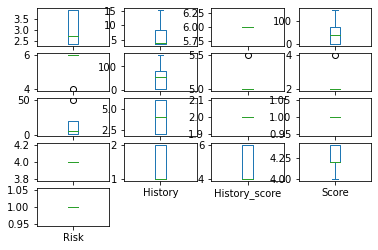

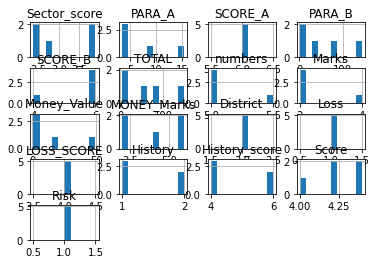

In [21]:
data.dropna(inplace=True)
data.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False)
data.hist()
plt.show()

               Sector_score    PARA_A  SCORE_A    PARA_B   SCORE_B     TOTAL  \
Sector_score       1.000000  0.869871      NaN  0.244662  0.484793  0.319056   
PARA_A             0.869871  1.000000      NaN -0.008030  0.380587  0.078372   
SCORE_A                 NaN       NaN      NaN       NaN       NaN       NaN   
PARA_B             0.244662 -0.008030      NaN  1.000000  0.479363  0.996263   
SCORE_B            0.484793  0.380587      NaN  0.479363  1.000000  0.510778   
TOTAL              0.319056  0.078372      NaN  0.996263  0.510778  1.000000   
numbers           -0.484793 -0.380587      NaN -0.479363 -1.000000 -0.510778   
Marks             -0.484793 -0.380587      NaN -0.479363 -1.000000 -0.510778   
Money_Value       -0.650050 -0.573651      NaN -0.196023 -0.928353 -0.244977   
MONEY_Marks       -0.860188 -0.802582      NaN  0.136346 -0.559017  0.066606   
District                NaN       NaN      NaN       NaN       NaN       NaN   
Loss                    NaN       NaN   

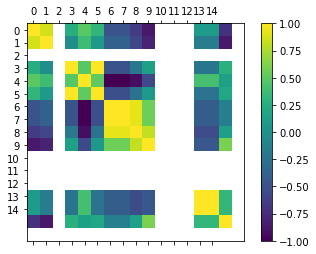

In [22]:
correlations = data.corr()
print(correlations)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,15,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticklabels(names)
#ax.set_yticklabels(names)
plt.show()

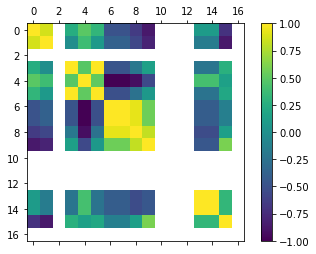

In [23]:
#data = pd.read_csv("heart_risk.csv")
correlations = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

In [24]:
import pandas as pd
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
filename = r"audit_trial.csv"
names = ['Sector_score','LOCATION_ID','PARA_A','SCORE_A','PARA_B','SCORE_B','TOTAL','numbers','Marks','Money_Value','MONEY_Marks','District','Loss','LOSS_SCORE','History','History_score','Score','Risk']
data = pd.read_csv(filename, names=names)
#data[['Sector_score', 'PARA_A', 'PARA_B', 'SCORE_B', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks']] = data[['Sector_score', 'PARA_A', 'PARA_B', 'SCORE_B', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks']].replace(0, np.NaN)
#data[['Sector_score', 'PARA_A', 'PARA_B', 'SCORE_B', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks']] = data[['Sector_score', 'PARA_A', 'PARA_B', 'SCORE_B', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks']].replace(99999, np.NaN)
data[['Sector_score','LOCATION_ID','PARA_A','SCORE_A','PARA_B','SCORE_B','TOTAL','numbers','Marks','Money_Value','MONEY_Marks','District','Loss','LOSS_SCORE','History','History_score','Score','Risk']]=data[['Sector_score','LOCATION_ID','PARA_A','SCORE_A','PARA_B','SCORE_B','TOTAL','numbers','Marks','Money_Value','MONEY_Marks','District','Loss','LOSS_SCORE','History','History_score','Score','Risk']].replace(0, np.NaN)
data[['Sector_score','LOCATION_ID','PARA_A','SCORE_A','PARA_B','SCORE_B','TOTAL','numbers','Marks','Money_Value','MONEY_Marks','District','Loss','LOSS_SCORE','History','History_score','Score','Risk']]=data[['Sector_score','LOCATION_ID','PARA_A','SCORE_A','PARA_B','SCORE_B','TOTAL','numbers','Marks','Money_Value','MONEY_Marks','District','Loss','LOSS_SCORE','History','History_score','Score','Risk']].replace(99999, np.NaN)
data.dropna(inplace=True) 
data.fillna(data.mean(), inplace=True) 

In [25]:
len(names)

18

In [26]:
data

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
11,3.89,8,15.38,6,40.14,6,55.52,5.0,2,0.96,2,2,1.0,4,1.0,4,4.0,1.0
85,3.89,9,8.46,6,72.76,6,81.22,5.0,2,1.40,2,2,1.0,4,2.0,6,4.2,1.0
206,2.72,13,3.84,6,144.39,6,148.23,5.0,2,19.68,6,2,1.0,4,1.0,4,4.4,1.0
272,2.37,18,3.43,6,1.00,4,4.43,5.5,4,49.31,6,2,1.0,4,1.0,4,4.2,1.0
283,2.37,27,3.61,6,2.13,6,5.74,5.0,2,5.41,4,2,1.0,4,2.0,6,4.4,1.0


In [29]:
array = data.values
X = array[:,0:len(names)-1]
Y = array[:,len(names)-1]
# feature extraction
test = SelectKBest(score_func=chi2, k=6)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)

ValueError: Unknown label type: (array([1.0, 1.0, 1.0, 1.0, 1.0], dtype=object),)

In [28]:
array = data.values
X = array[:,0:7]
Y = array[:,7]
# feature extraction
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)

ValueError: Unknown label type: (array([5.0, 5.0, 5.0, 5.5, 5.0], dtype=object),)

In [ ]:
filename = 'D:\ML & DM\Midterm1\heart_risk.csv'
names = ['Age','Sex','CP','Trestbps','Chol']
raw_data = read_csv(filename, names=names)
array = raw_data.values
X = array[:,0:5]
Y = array[:,5]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])


C:\Users\myneee101\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 6.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\myneee101\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 2.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\myneee101\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\myneee101\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 4.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\myneee1

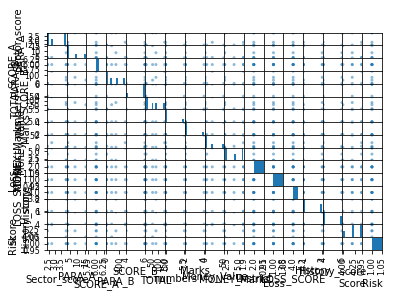

In [69]:
# scatter plot matrix
scatter_matrix(data)
plt.show()

In [ ]:
import pandas as pd
# Create the pandas DataFrame with column name is provided explicitly
df = pd.DataFrame(data, columns=['Numbers'])

In [ ]:
My_Dataset  = read_csv(url, names=names)

In [134]:
data = pd.read_csv("audit_trial12.csv")

In [135]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
#filename = 'pima-indians-diabetes_Gokaraju.csv'
filename = 'audit_trial12.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

data = read_csv(filename, names=names)
data[['plas', 'pres', 'skin', 'test', 'mass']] = data[['plas', 'pres', 'skin', 'test', 'mass']].replace(0, np.NaN)
data[['plas', 'pres', 'skin', 'test', 'mass']] = data[['plas', 'pres', 'skin', 'test', 'mass']].replace(99999, np.NaN)
data.dropna(inplace=True) 
array = data.values
#array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=chi2, k=7)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[nan nan nan nan nan nan nan nan]
[[2.  2.  1.  4.  1.  4.  4. ]
 [2.  2.  1.  4.  2.  6.  4.2]
 [6.  2.  1.  4.  1.  4.  4.4]
 [6.  2.  1.  4.  1.  4.  4.2]
 [4.  2.  1.  4.  2.  6.  4.4]]


In [4]:
# Cross Validation Classification ROC AUC
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'pima-indians-diabetes_Gokaraju.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [5]:
# Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'pima-indians-diabetes_Gokaraju.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.